<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/NDVI_vs_RelHumidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

fatal: destination path 'CIMIS' already exists and is not an empty directory.


In [4]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata

In [5]:
station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]

for id in station_ids:
  file = f'/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(file)
  df.set_index(pd.to_datetime(df.Date, format='mixed'), inplace=True)
  last_day = df.resample('M').last()
  last_day.set_index(pd.to_datetime(last_day.Date, format='mixed'), inplace=True)
  first_day = df.resample('M').first()
  first_day.set_index(pd.to_datetime(first_day.Date, format='mixed'), inplace=True)
  out_df = pd.DataFrame()
  for i in range(last_day.index.size):
    filtered_df = df.loc[first_day.index[i]:last_day.index[i]]
    filtered_df.loc[:,'d_ETo_avg'] = last_day.iloc[i]['d_ETo_avg']
    out_df = pd.concat([out_df, filtered_df])
  out_df.to_csv(file, index=False)

In [6]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None
import matplotlib.cm as cm


StopIteration: 

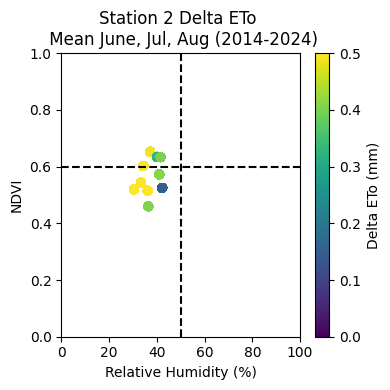

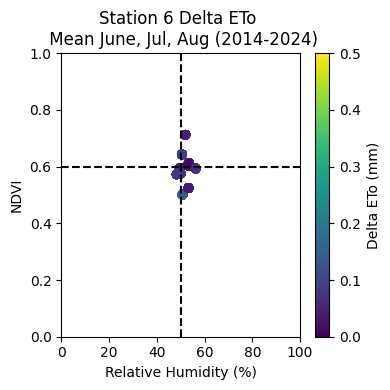

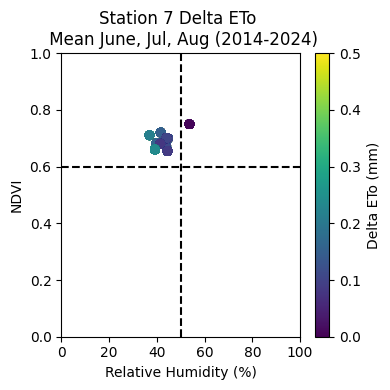

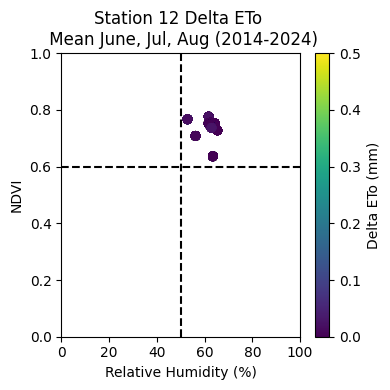

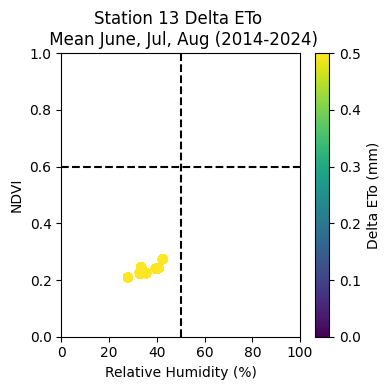

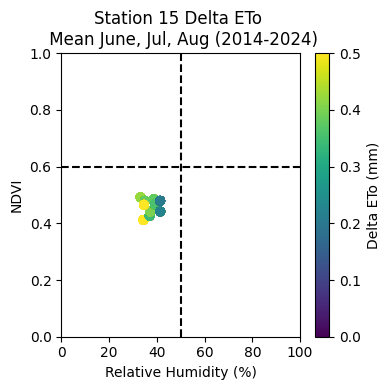

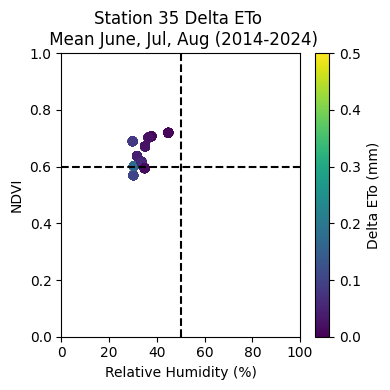

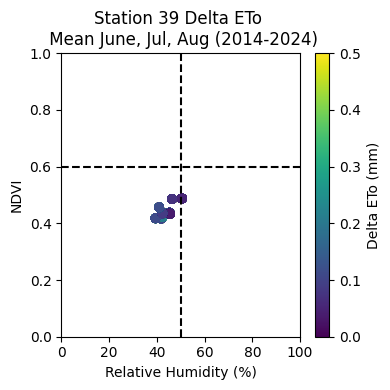

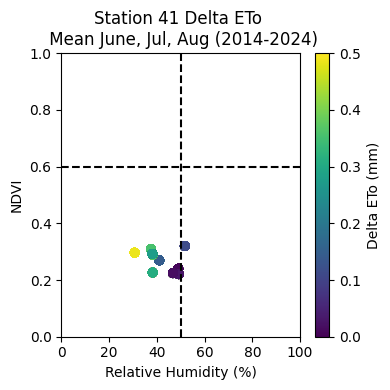

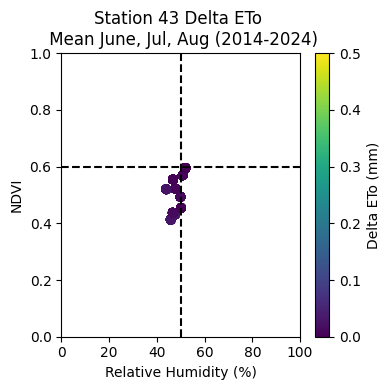

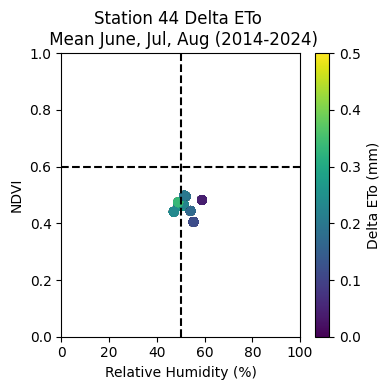

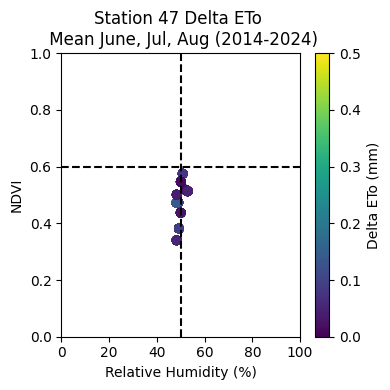

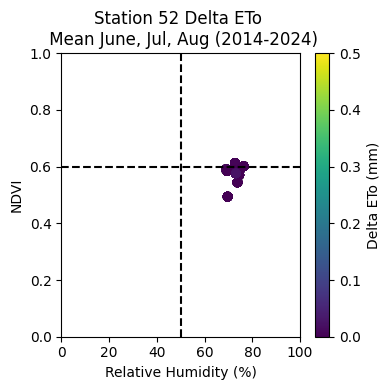

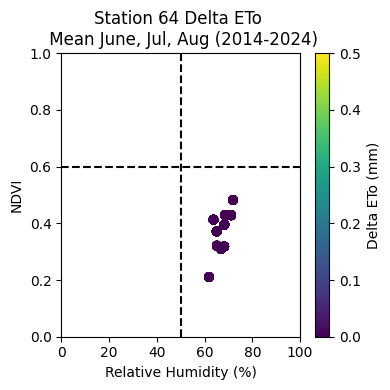

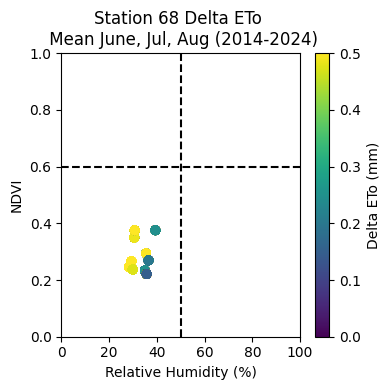

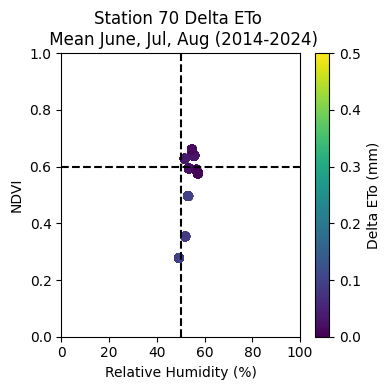

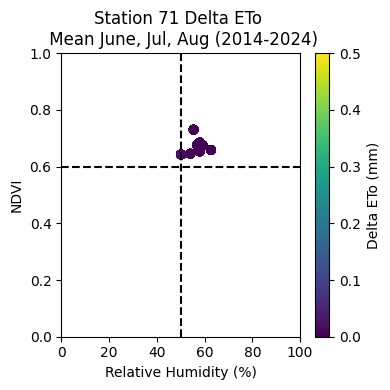

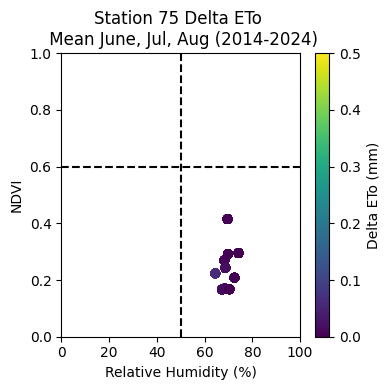

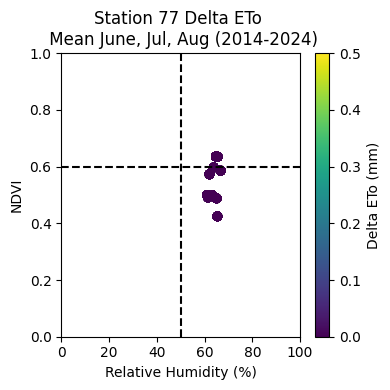

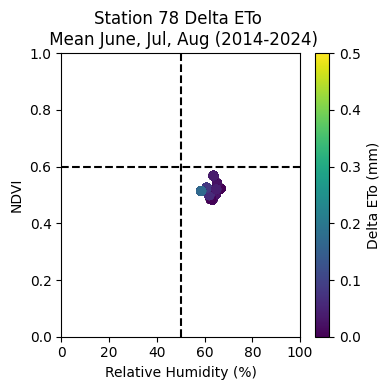

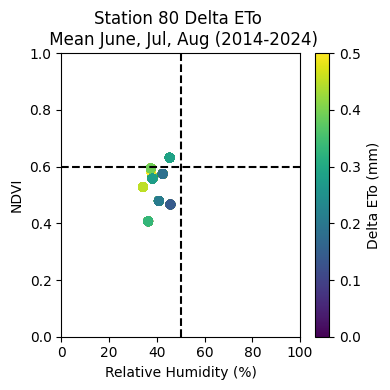

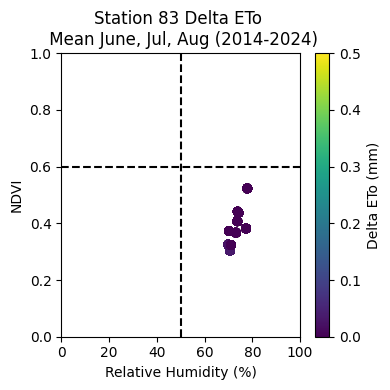

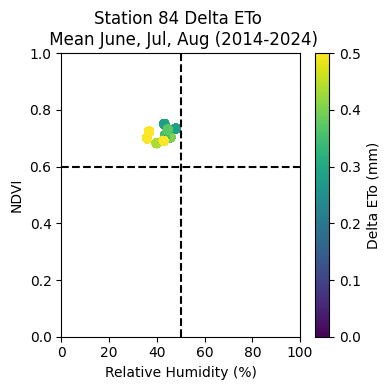

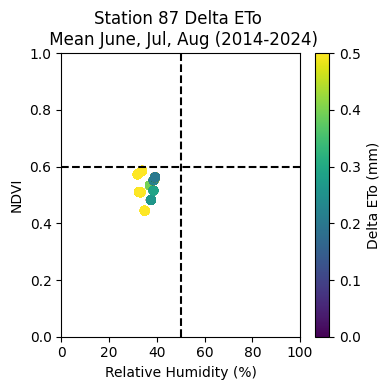

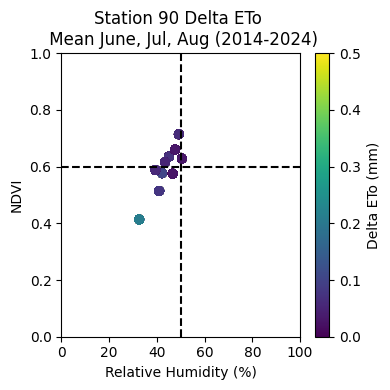

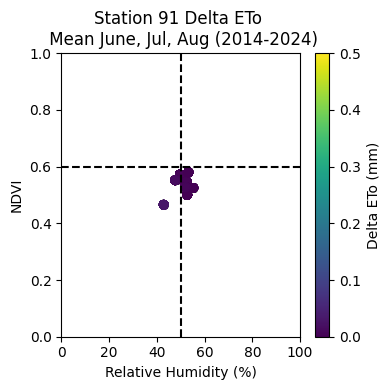

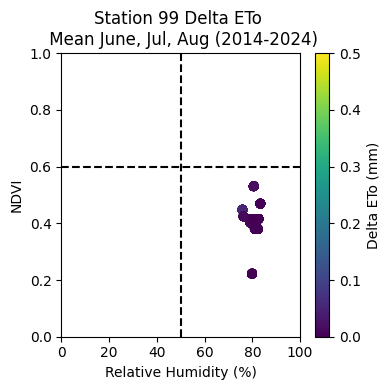

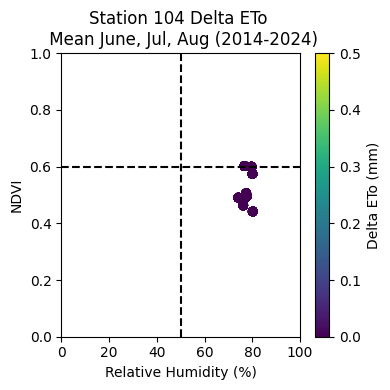

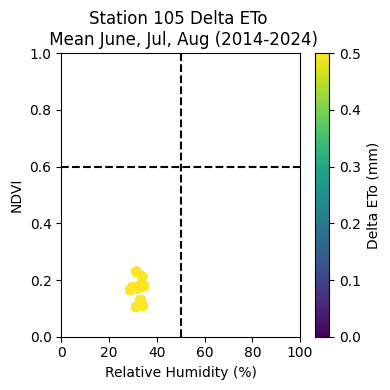

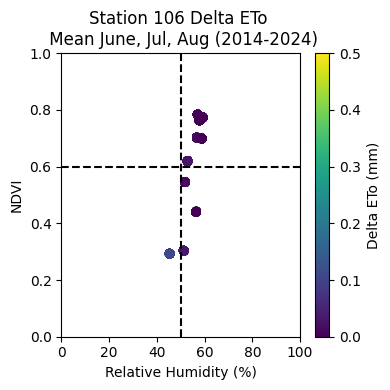

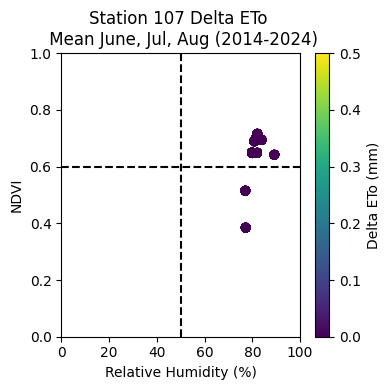

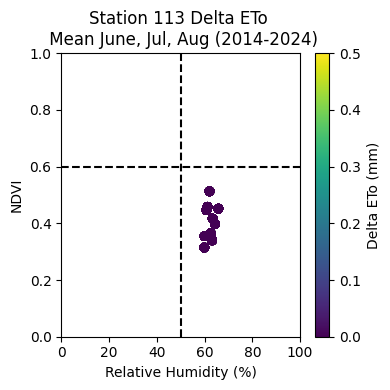

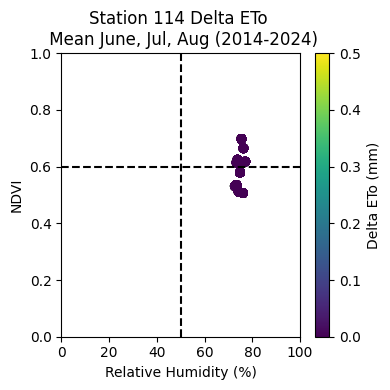

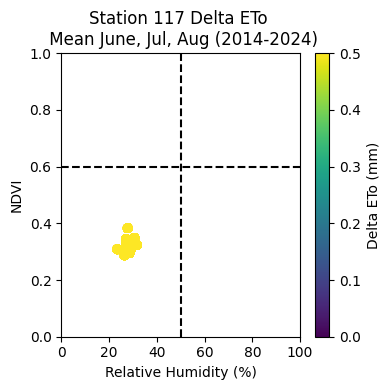

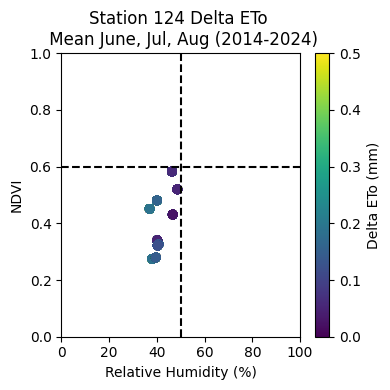

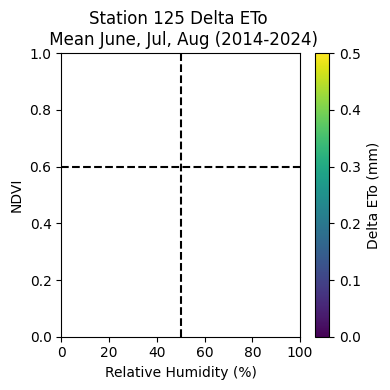

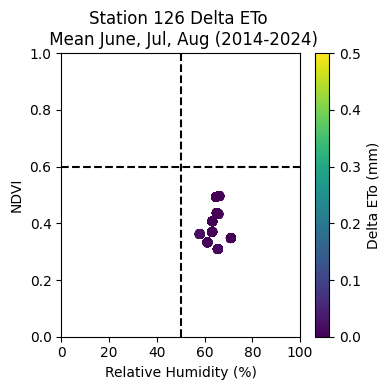

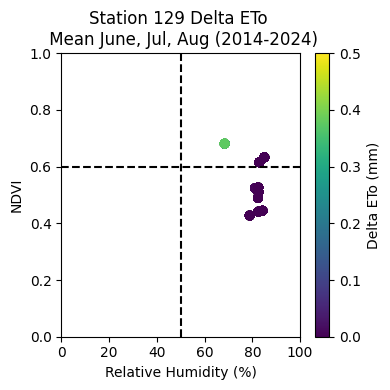

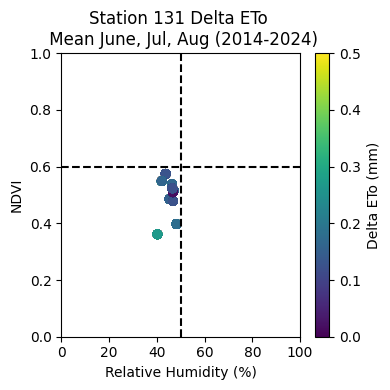

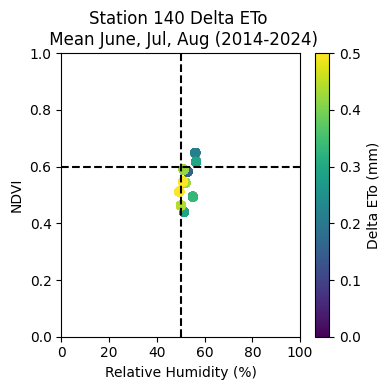

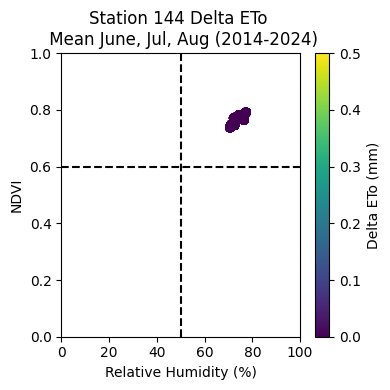

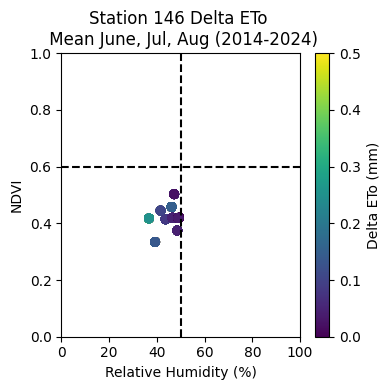

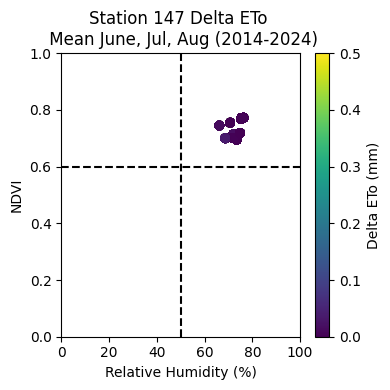

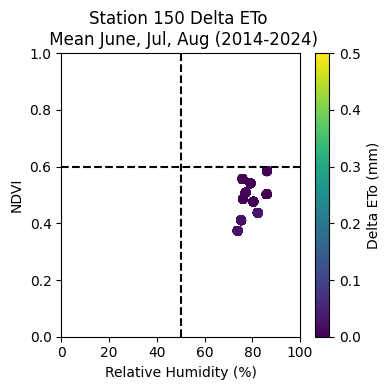

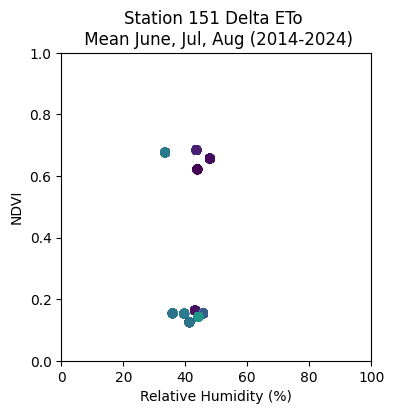

In [21]:

dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'

station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]
# station_ids = [2, 80, 182, 258]
# station_ids = [2,6,7]
all_rh_ndvi = pd.DataFrame(columns=['SID','dETo_mm','RHavg','NDVIavg','Year'])

for id in station_ids:
  plt.figure(figsize=(4,4))

  file = f'{dir}station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(file)
  df['Date'] = pd.to_datetime(df['Date'])
  df.set_index(pd.to_datetime(df.Date), inplace=True)
  #for mon in range(6,9):
  df_jja = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)]

  # fig, axs = plt.subplots(1,1,figsize=(4,4))

  for year in range(2014,2025):
    df_jja_yr = df_jja[(df['Date'].dt.year == year)]

    if not df_jja_yr.empty:
      rh_mean = df_jja_yr['RHavg'].mean()
      df_jja_yr.loc[:,'RHavg_mean'] = rh_mean
      ndvi_mean = df_jja_yr['NDVI_interp'].mean()
      df_jja_yr.loc[:,'NDVI_mean'] = ndvi_mean
      dETo_avg = df_jja_yr['d_ETo_avg'].mean()
      # norm = plt.Normalize(df_jja['d_ETo_avg'].min(), df_jja['d_ETo_avg'].max())
      norm = plt.Normalize(0.0, 0.5)
      all_rh_ndvi.loc[len(all_rh_ndvi.index)] = [id,dETo_avg,rh_mean,ndvi_mean, year]

      #cmap = cm.get_cmap('viridis')

      # Create a scatter plot
      # plt.scatter(df_jja_yr['RHavg'], df_jja_yr['NDVI_interp'], c=df_jja_yr['d_ETo'], cmap=cmap, norm=norm)
      plt.scatter(df_jja_yr['RHavg_mean'], df_jja_yr['NDVI_mean'], c=df_jja_yr['d_ETo_avg'], norm=norm)
      # plt.scatter(df_jja['RHavg'], df_jja['NDVI_interp'], c=df_jja['d_ETo'], norm=norm)
      # Add labels and title
      plt.xlim([0,100])
      plt.ylim([0.0,1.0])
      plt.xlabel('Relative Humidity (%)')
      plt.ylabel('NDVI')
      plt.title(f'Station {id} Delta ETo \n Mean June, Jul, Aug (2014-2024)')


    else:
      continue

  plt.plot(np.ones(len(np.arange(0,1.1,0.1)))*50,np.arange(0,1.1,0.1),'k--')
  plt.plot(np.arange(0,110,10),np.ones(len(np.arange(0,110,10)))*.6,'k--')

  # plt.title(f'Delta ETo \n Mean June, Jul, Aug (2014-2024)'+'\nStations'+', '.join(str(x) for x in station_ids))
  plt.colorbar(label='Delta ETo (mm)')
  plt.tight_layout()
plt.show()




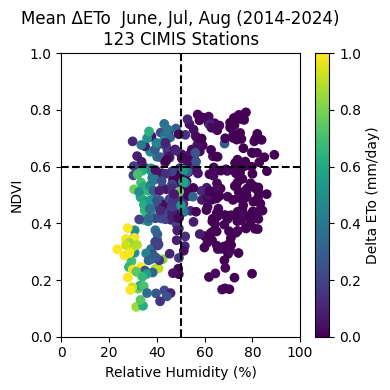

In [30]:
plt.figure(figsize=(4,4))
norm = plt.Normalize(0.0, 1.0)
plt.scatter(all_rh_ndvi['RHavg'], all_rh_ndvi['NDVIavg'], c=all_rh_ndvi['dETo_mm'], norm=norm)
plt.xlim([0,100])
plt.ylim([0.0,1.0])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('NDVI')
plt.plot(np.ones(len(np.arange(0,1.1,0.1)))*50,np.arange(0,1.1,0.1),'k--')
plt.plot(np.arange(0,110,10),np.ones(len(np.arange(0,110,10)))*.6,'k--')
plt.title(f'Mean ΔETo  June, Jul, Aug (2014-2024)\n'+f'{str(len(station_ids))} CIMIS Stations')
plt.colorbar(label='Delta ETo (mm/day)')
plt.tight_layout()
plt.show()


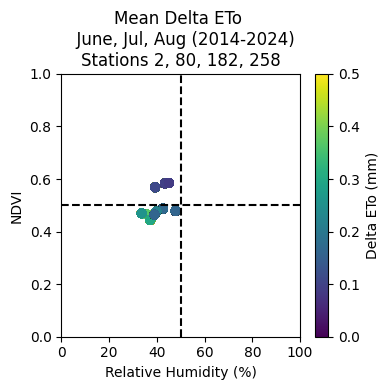

In [ ]:

# dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'

# #station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]
# station_ids = [2, 80, 182, 258]

# df = pd.DataFrame()
# for id in station_ids:
#   file = f'{dir}station_id{id}_cimis_daily_corr.csv'
#   df_id = pd.read_csv(file)
#   df = pd.concat([df, df_id])

# plt.figure(figsize=(4,4))

# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index(pd.to_datetime(df.Date), inplace=True)

# df_jja = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)]

# years = list(range(2014,2025))
# for year in years:
#   df_jja_yr = df_jja[(df_jja['Date'].dt.year == year)]

#   if not df_jja_yr.empty:
#     df_jja_yr.loc[:,'RHavg_mean'] = df_jja_yr['RHavg'].mean()
#     df_jja_yr.loc[:,'NDVI_mean'] = df_jja_yr['NDVI_interp'].mean()
#     norm = plt.Normalize(0.0, 0.5)

#     plt.scatter(df_jja_yr['RHavg_mean'], df_jja_yr['NDVI_mean'], c=df_jja_yr['d_ETo_avg'], norm=norm)
#   else:
#     continue

# plt.xlim([0,100])
# plt.ylim([0.0,1.0])
# plt.xlabel('Relative Humidity (%)')
# plt.ylabel('NDVI')
# plt.plot(np.ones(len(np.arange(0,1.1,0.1)))*50,np.arange(0,1.1,0.1),'k--')
# plt.plot(np.arange(0,110,10),np.ones(len(np.arange(0,110,10)))*.6,'k--')

# plt.colorbar(label='Delta ETo (mm)')
# plt.title(f'Mean Delta ETo \n  June, Jul, Aug (2014-2024)'+'\nStations '+', '.join(str(x) for x in station_ids))
# plt.tight_layout()
# plt.show()


